<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Laboratorios/Laboratorio_12_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest



Los arboles de desicion se ajustan muy bien a los datos de entrenamiento, sin embargo no permiten generalización. El overfiting es la caracteristica mas importante. Para dar solucion, se propone el algoritmo de random foreset basado en dos caracteristicas:

# 1. Se enetrenan varios árboles con diferentes subconjuntos del dataset original. Para ello se emplea bootstraping dentro de los datos del dataset inicial.


Dado un dataset con las siguientes caracteristicas:


|index|$y^{}$          |X1  |X2 |X3 |X4 |
|-|----------|-----|-----|-----|-----|
|1| |$y^{(1)}$ |$X_1^{1}$|$X_2^{1}$|$X_3^{1}$|$X_4^{1}$|
|2||$y^{(2)}$ |$X_1^{2}$|$X_2^{2}$|$X_3^{2}$|$X_4^{2}$|
|3||$y^{(3)}$ |$X_1^{3}$|$X_2^{3}$|$X_3^{3}$|$X_4^{3}$|
|4||$y^{(4)}$ |$X_1^{4}$|$X_2^{4}$|$X_3^{4}$|$X_4^{4}$|


Podemos definir como un hyperparametro el número de arboles, y también los datos que ingresan a cada árbol, para ello emplearemos la tecnica de [bootstraping](https://en.wikipedia.org/wiki/Bootstrapping_(statistics).


El botstrapping es una técnica de muestreo con reposición que se realiza para cada árbol, asi si se tienen 10 árboles, el muestre con reposicion  para los indices puede ser como sigue:
```

In: np.random.randint(0, 4, (10,4))

  
Out: array([[1, 0, 3, 3],
       [2, 1, 2, 0],
       [2, 3, 3, 3],
       [0, 2, 2, 3],
       [2, 0, 3, 3],
       [1, 1, 2, 0],
       [2, 2, 1, 2],
       [3, 0, 1, 0],
       [3, 1, 0, 2],
       [2, 0, 2, 0]])

```

Lo anterior quiere decir que el conjunto de datos del árbol 1, puede ser entrenado con las  X1, X2, X3, X4 con los datos de entrenamiento 2, 1, 2, 0


Cada fila del anterior array es usado como input para entrenar cada arbol, notese que los valores se puden repetir para entrenar el árbol i-esimo. 


- Para cada nodo de todos los arboles se selecciona un número aleatorio de características, hasta cosntruir el árbol completo. 


Al final se tendran un conjunto de arboles de desición sobre los cuales se aplicará agregación, es decir, cuando se pasa un nuevo dato de entrenamiento los arboles realizan la clasificación y se toma el valor elegido por la mayoria de los arboles



bagging = Agregation + bootstraping


Random forest permite seleccionar las caracteristicas más importantes


La estategia para optimizar los bosques pueden ser elegidos como sigue:

Fijar el numero de caracteristicas y el criterio de parada.

1. Determinar el error como función del número de árboles.

2. Definido el número de árboles y calculamos el error como función del numero de caracteristicas.

3. Con el numero de arboles fijo y el numero de caracteristicas, se optmiza el criterio de parada, (numero minimo de datos de una hoja)




REF: https://www.youtube.com/watch?v=3pa0vtW64Ic&ab_channel=CodificandoBits
https://en.wikipedia.org/wiki/Bootstrap_aggregating

ref: http://www.cs.cmu.edu/~qyj/papersA08/11-rfbook.pdf

ref : https://github.com/ageron/handson-ml2/blob/master/07_ensemble_learning_and_random_forests.ipynb


In [1]:
#https://github.com/ageron/handson-ml2/blob/master/07_ensemble_learning_and_random_forests.ipynb

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

print(clf.predict([[0, 0, 0, 0]]))

[1]


Laboratorio: 

1. Cargar load digitis
```
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[95])
plt.show()
```

2, Aplicar random foreset usando sklearn

(1797, 64)


<Figure size 640x480 with 0 Axes>

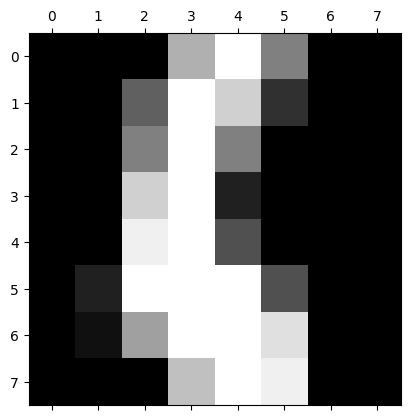

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[95])
plt.show()

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import numpy as np

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño conjunto entrenamiento: {X_train.shape}")
print(f"Tamaño conjunto prueba: {X_test.shape}")
print(f"Número de clases: {len(np.unique(y))}")

Tamaño conjunto entrenamiento: (1437, 64)
Tamaño conjunto prueba: (360, 64)
Número de clases: 10


In [5]:
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)

print(f"Precisión en entrenamiento: {forest_clf.score(X_train, y_train):.4f}")
print(f"Precisión en prueba: {forest_clf.score(X_test, y_test):.4f}")

some_digit = X_test[0]
prediction = forest_clf.predict([some_digit])
probabilities = forest_clf.predict_proba([some_digit])

print(f"\nPredicción para primer dígito de prueba: {prediction[0]}")
print(f"Etiqueta real: {y_test[0]}")
print(f"Probabilidades: {probabilities[0]}")


Precisión en entrenamiento: 1.0000
Precisión en prueba: 0.9722

Predicción para primer dígito de prueba: 6
Etiqueta real: 6
Probabilidades: [0.   0.   0.01 0.01 0.   0.   0.97 0.   0.01 0.  ]


In [6]:
scores = cross_val_score(forest_clf, X_train, y_train, cv=5, scoring="accuracy")
print(f"Precisión promedio (CV=5): {scores.mean():.4f}")
print(f"Desviación estándar: {scores.std():.4f}")
print(f"Scores individuales: {scores}")


Precisión promedio (CV=5): 0.9736
Desviación estándar: 0.0078
Scores individuales: [0.97916667 0.96875    0.96515679 0.98606272 0.96864111]


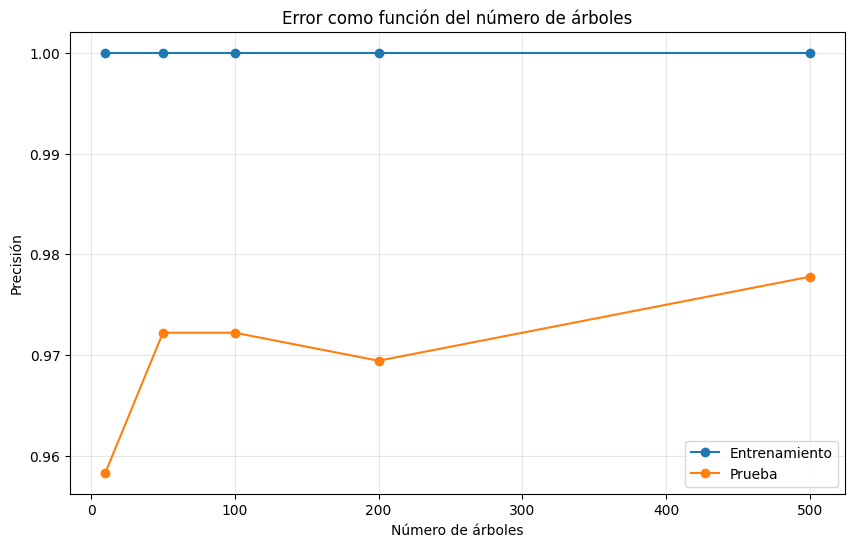

In [7]:
n_estimators_range = [10, 50, 100, 200, 500]
train_scores = []
test_scores = []

for n_est in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n_est, random_state=42)
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_scores, 'o-', label='Entrenamiento')
plt.plot(n_estimators_range, test_scores, 'o-', label='Prueba')
plt.xlabel('Número de árboles')
plt.ylabel('Precisión')
plt.title('Error como función del número de árboles')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [8]:
param_grid = [
    {'n_estimators': [10, 30, 100], 'max_features': [4, 8, 16]},
    {'bootstrap': [False], 'n_estimators': [10, 30], 'max_features': [4, 8]},
]

forest_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(forest_clf, param_grid, cv=5, 
                           scoring='accuracy', return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor score: {grid_search.best_score_:.4f}")


Mejores parámetros: {'max_features': 8, 'n_estimators': 100}
Mejor score: 0.9736


In [9]:
best_forest = grid_search.best_estimator_
print(f"Precisión en entrenamiento: {best_forest.score(X_train, y_train):.4f}")
print(f"Precisión en prueba: {best_forest.score(X_test, y_test):.4f}")

feature_importances = best_forest.feature_importances_

print(f"\nTop 10 características más importantes:")
indices = np.argsort(feature_importances)[::-1][:10]
for i in indices:
    print(f"Característica {i}: {feature_importances[i]:.4f}")


Precisión en entrenamiento: 1.0000
Precisión en prueba: 0.9722

Top 10 características más importantes:
Característica 21: 0.0515
Característica 36: 0.0446
Característica 43: 0.0401
Característica 26: 0.0374
Característica 42: 0.0367
Característica 33: 0.0314
Característica 28: 0.0313
Característica 20: 0.0301
Característica 61: 0.0294
Característica 30: 0.0288


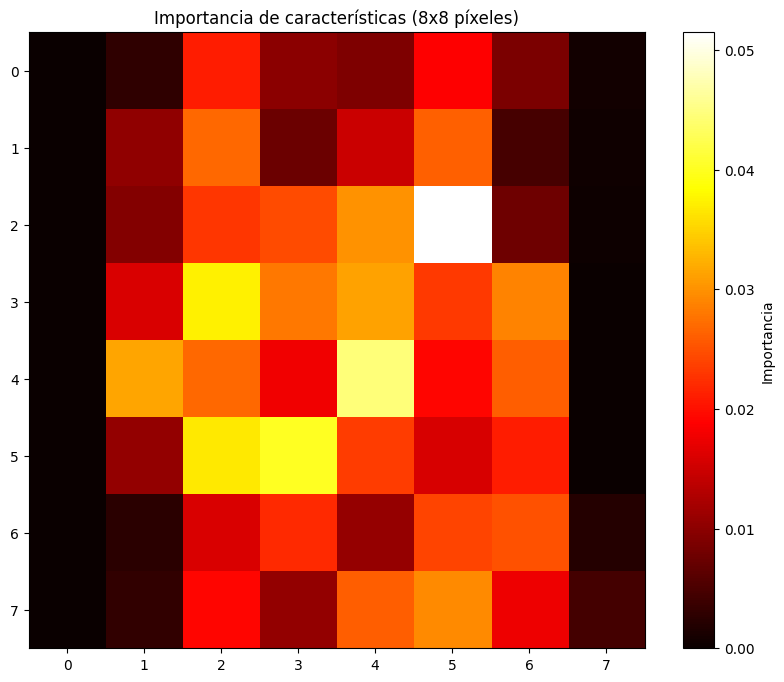

In [10]:
feature_importances_reshaped = feature_importances.reshape(8, 8)

plt.figure(figsize=(10, 8))
plt.imshow(feature_importances_reshaped, cmap='hot', interpolation='nearest')
plt.colorbar(label='Importancia')
plt.title('Importancia de características (8x8 píxeles)')
plt.show()


In [11]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_forest.predict(X_test)

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360


Matriz de confusión:
[[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  1  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0